<a href="https://colab.research.google.com/github/VMW75/DataScience_EDA-PROJECT/blob/main/EDA_Google_Play_store_dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** :- Google Play store dataset Analysis
**Project Type** :- EDA

Contribution:- Individual

# Project Summary

The data set contains following featues
1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app (as when scraped)
4. Reviews: Number of user reviews for the app (as when scraped)
5. Size: Size of the app (as when scraped)
6. Installs: Number of user downloads/installs for the app (as when scraped)
7. Type: Paid or Free
8. Price: Price of the app (as when scraped)
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store (as when scraped)
12. Current Ver: Current version of the app available on Play Store (as when scraped)
13. Android Ver: Min required Android version (as when scraped)

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler


Dataset Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project01/google dataset.csv/Play Store Data.csv')

Checking features of each column given in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10841, 13)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df1 = df.head()
df2 = df.tail()
concat_df = pd.concat([df1,df2],axis=0,ignore_index=True)
concat_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


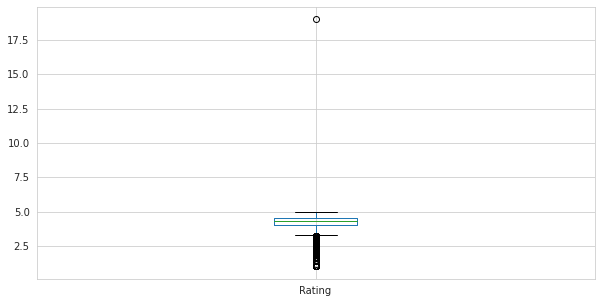

In [ ]:
df.boxplot();

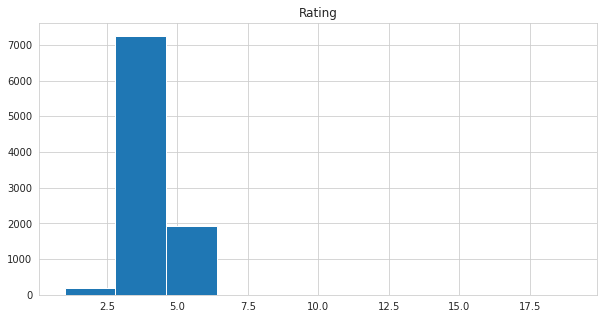

In [ ]:
df.hist();

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:

df.loc[10472] = df.loc[10472].shift()
df['App'].loc[10472] = df['Category'].loc[10472]
df['Category'].loc[10472] = np.nan
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [ ]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].dtype

dtype('float64')

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df[df['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df['Reviews'] = df.Reviews.replace("0.0",0)
df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000") # All size values became the kilobyte type.
df['Size'] = df.Size.str.replace("k"," ")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] = df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Installs'] = df.Installs.replace(",","")
df['Installs'] = df.Installs.replace("+","")
df['Installs'] = df.Installs.replace("Free",np.nan)
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

dtype('float64')

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.replace("$","").astype(float)
df['Price'].dtype

dtype('float64')

In [ ]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068147,0.082495,0.051393,-0.021851
Reviews,0.068147,1.000000,0.233795,0.643123,-0.009666
Size,0.082495,0.233795,1.000000,0.164616,-0.022766
Installs,0.051393,0.643123,0.164616,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.022766,-0.011688,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


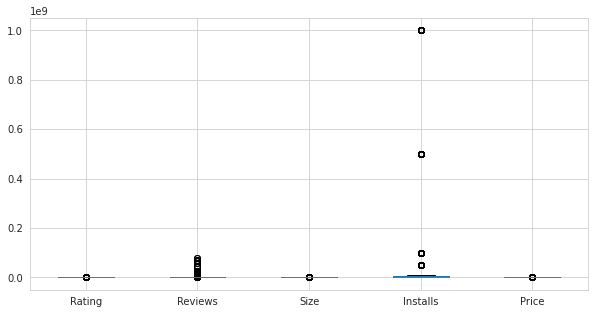

In [ ]:
df.boxplot()

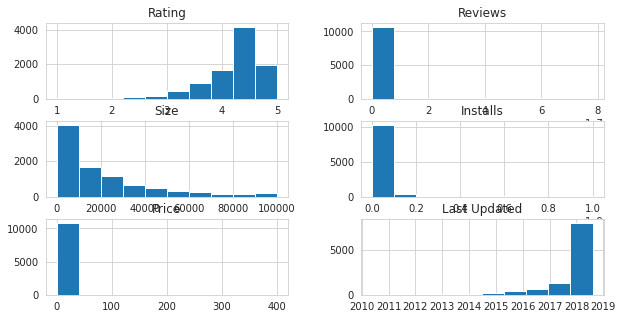

In [ ]:
df.hist();

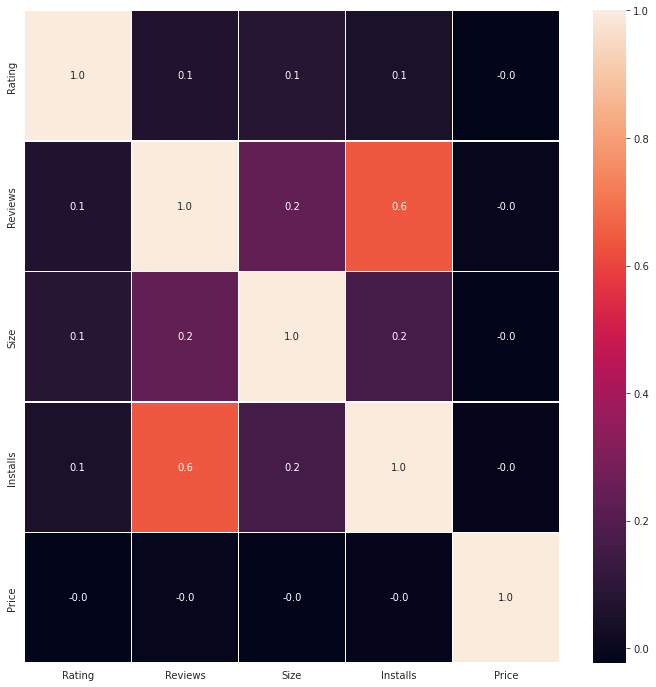

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,19577.279477,1.546291e+07,1.027273
std,0.515735,2.927629e+06,24041.618956,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


Countplot of Number of Apps on the basis of category

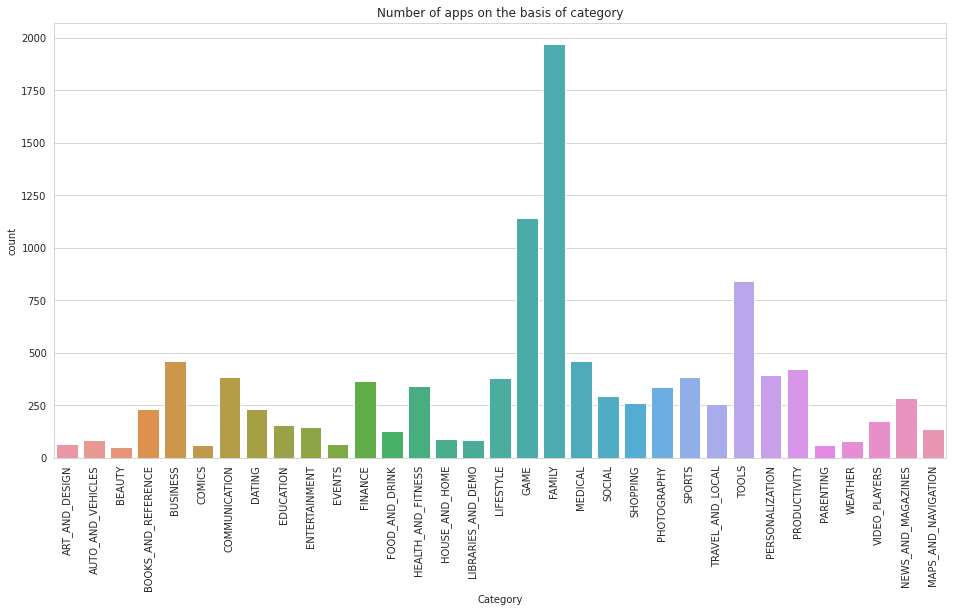

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Number of apps on the basis of category')
sns.countplot(x='Category',data = df)
plt.xticks(rotation=90)
plt.show()


Most of the apps in the playstore belong to the **Family** category followed by **Games** category

In [ ]:
category_list = list(df['Category'].unique())
category_review = []
for i in category_list:
    x = df[df['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)

In [ ]:
df_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (df_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data = df_category_reviews.reindex(new_index)

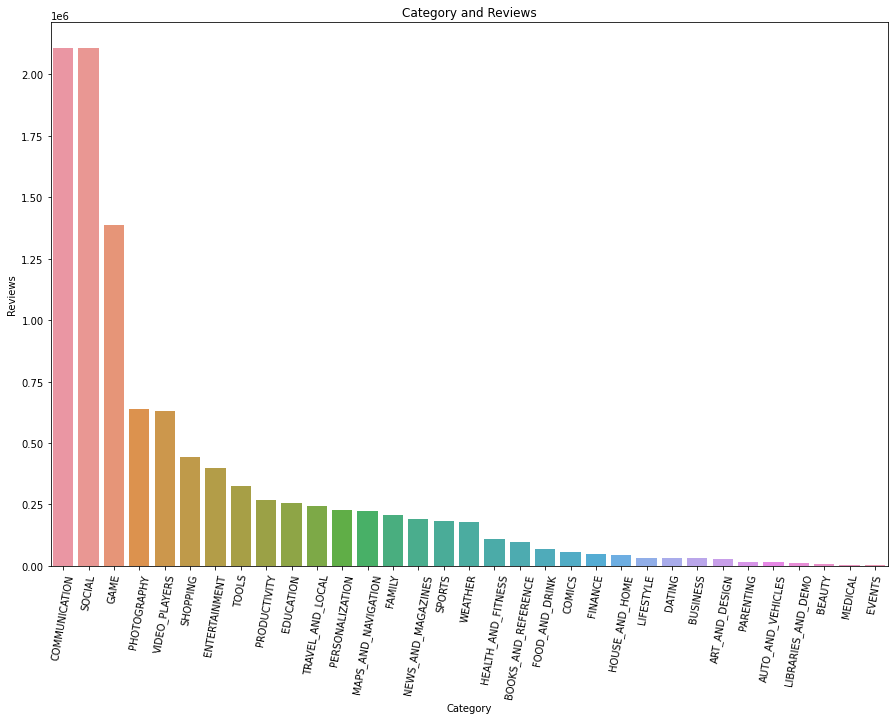

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

In [ ]:
category_list = list(df['Category'].unique())
category_install = []
for i in category_list:
    x = df[df['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)

In [ ]:
df_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (df_category_install['install'].sort_values(ascending=False)).index.values
sorted_data = df_category_install.reindex(new_index)

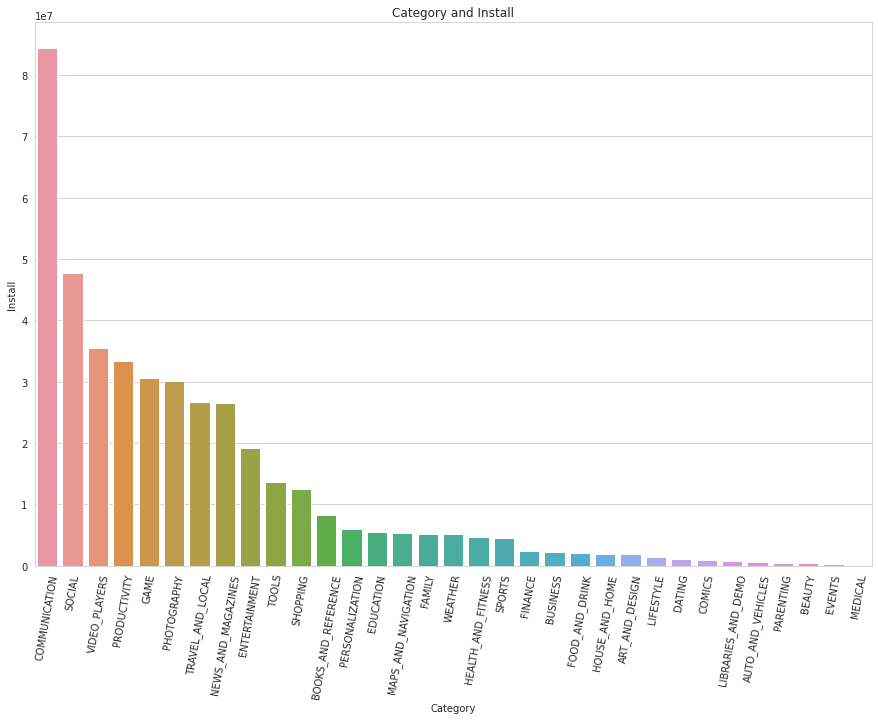

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

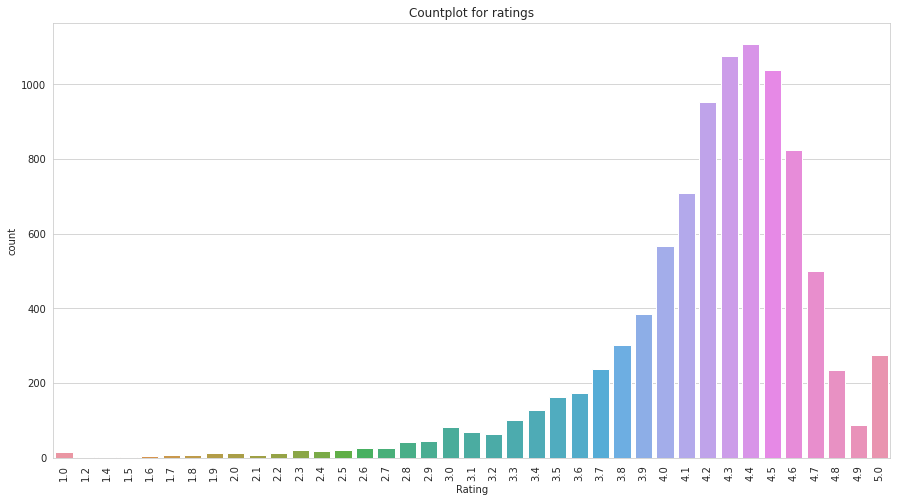

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = df)
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()

Percentage of Apps having ratings of 4 or greater

Top 10 App Categories

In [ ]:
category = pd.DataFrame(df['Category'].value_counts())        
category.rename(columns = {'Category':'Count'},inplace=True)

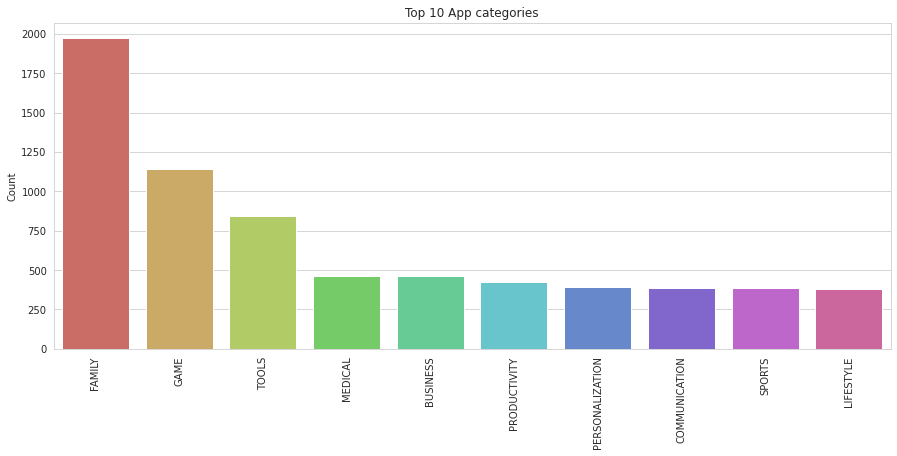

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [ ]:
family_category = len(df[df['Category'] == 'FAMILY'])/len(df)*100
games_category = len(df[df['Category'] == 'GAME'])/len(df)*100
beauty_category = len(df[df['Category'] == 'BEAUTY'])/len(df)*100
print('Percentage of Apps in the family category: {}%'.format(round(family_category,2)))
print('Percentage of Apps in the games category: {}%'.format(round(games_category,2)))
print('Percentage of Apps in the beauty category: {}%'.format(round(beauty_category,2)))

Percentage of Apps in the family category: 18.19%
Percentage of Apps in the games category: 10.55%
Percentage of Apps in the beauty category: 0.49%


**Family** category has the most number of apps with 18% of apps belonging to it followed by **Games** category which has 11% of the apps.Least number of apps belong to the **Beauty** category with less than 1% of the total apps belonging to it

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


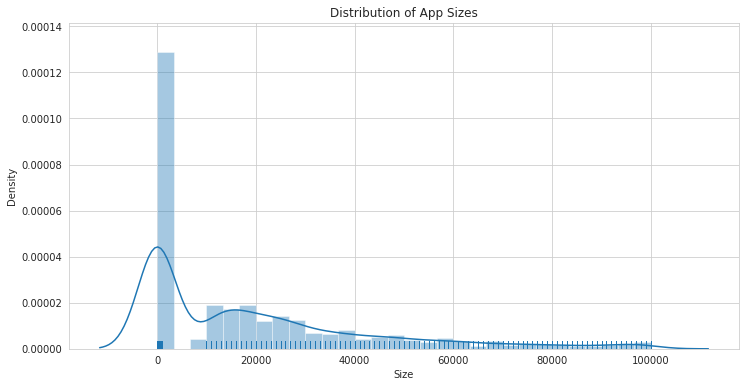

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribution of App Sizes')
sns.distplot(df['Size'],bins = 30,rug=True)
plt.show()

In [ ]:
#order = ['0','0+','1+','5+','10+','50+','100+','500+','1,000+','5,000+','10,000+','50,000+','100,000+','500,000+','1,000,000+',
       ##   '50,000,000+','100,000,000+','500,000,000+','1,000,000,000+']
#sns.set_style('whitegrid')
#plt.figure(figsize=(22,8))
#plt.title('Number of apps on the basis of Installs')
#sns.countplot(x='Installs',data = df,palette='hls',order = order)
#plt.xticks(rotation = 90)

#plt.show()

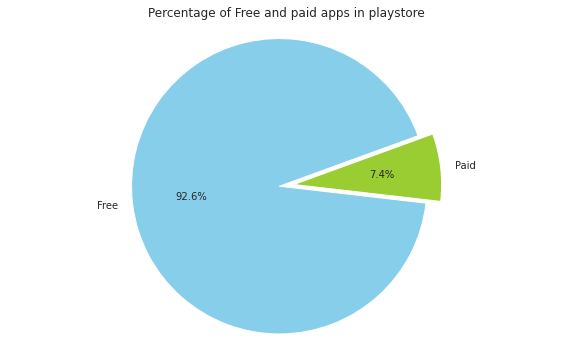

In [ ]:
plt.figure(figsize=(10,6))

# Data to plot
labels = ['Free','Paid']
sizes = [len(df[df['Type'] == 'Free']),len(df[df['Type'] == 'Paid'])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.title('Percentage of Free and paid apps in playstore')
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', startangle=380,colors=colors,explode=explode)

plt.axis('equal')
plt.show()


In [ ]:
paid_apps = df[df['Price'] != 0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


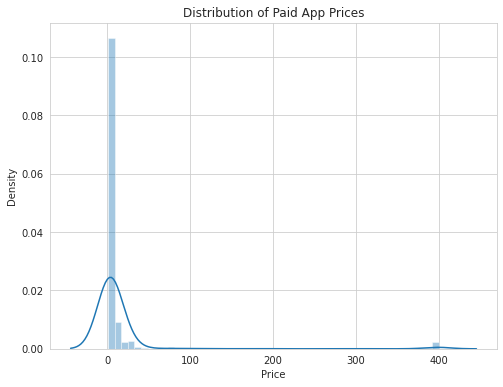

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Paid App Prices')
sns.distplot(paid_apps['Price'],bins=50)
plt.show()


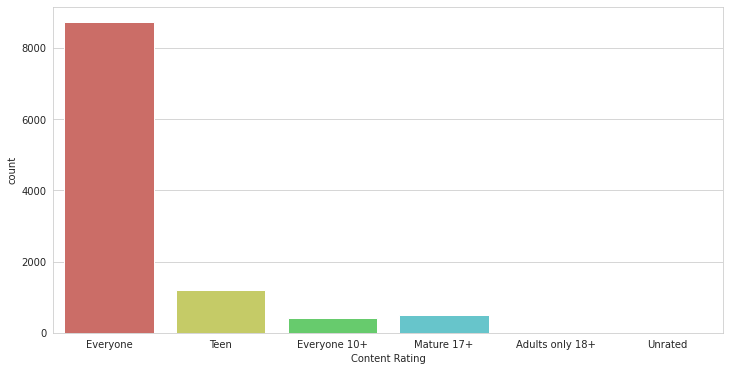

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Content Rating'],palette='hls')
plt.show()



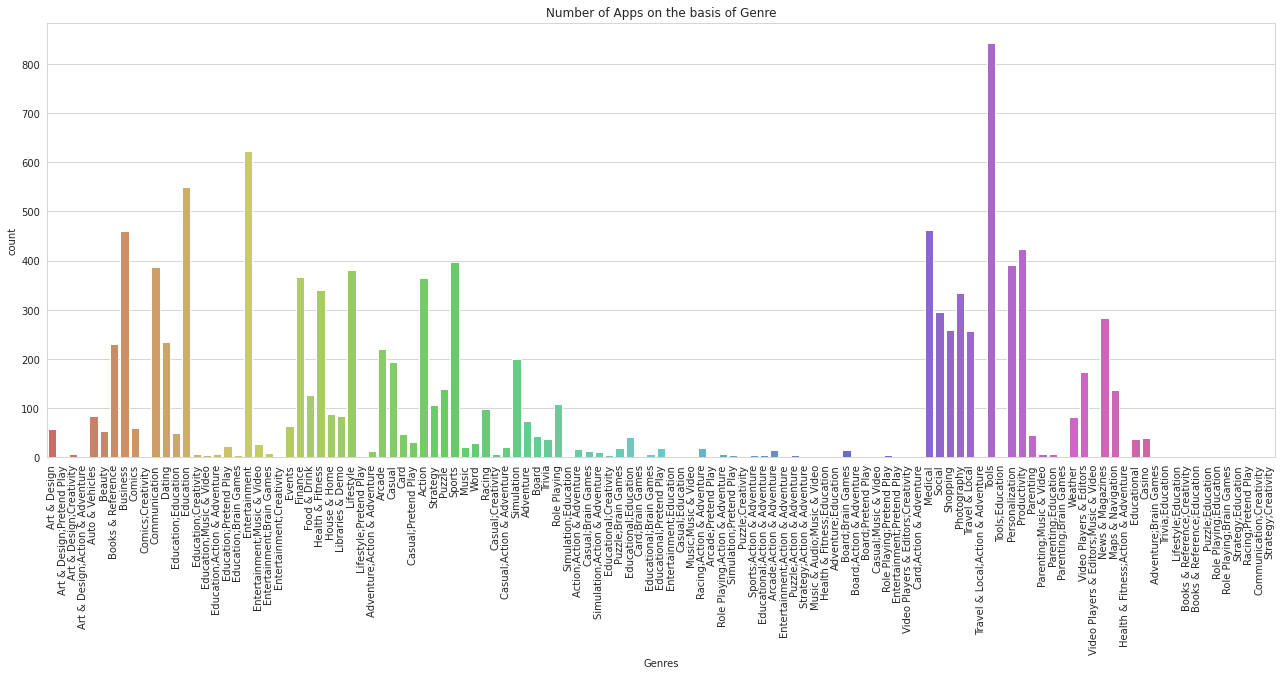

In [ ]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Genre')
sns.countplot(x='Genres',data = df,palette='hls')
plt.xticks(rotation = 90)
plt.show()


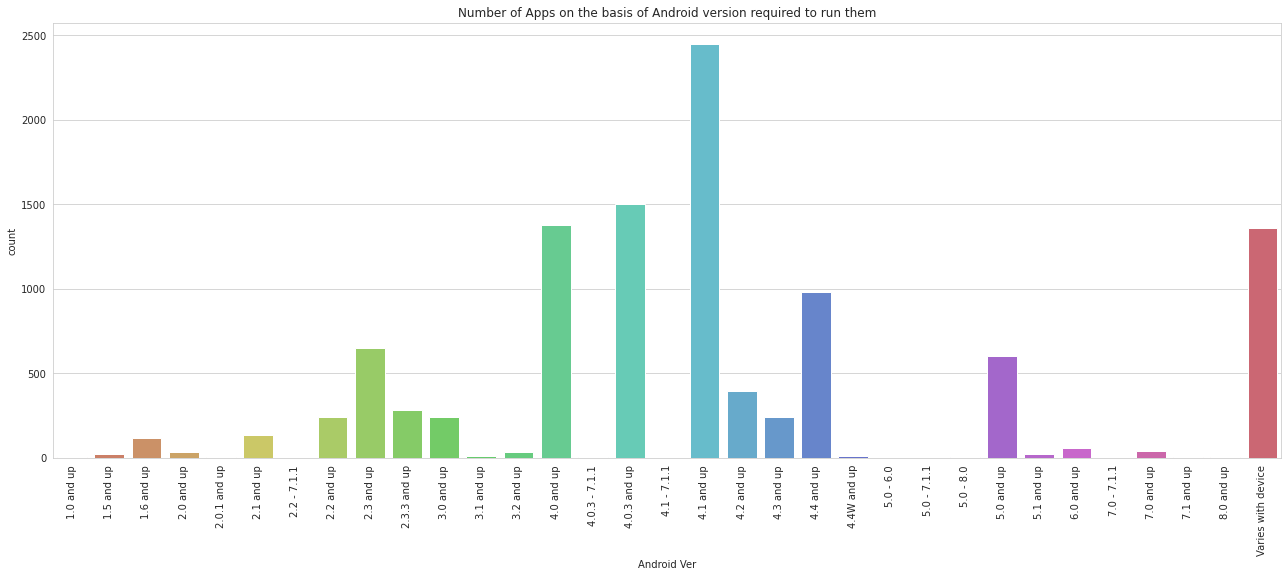

In [ ]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Android version required to run them')
sns.countplot(x='Android Ver',data = df.sort_values(by = 'Android Ver'),palette='hls')
plt.xticks(rotation = 90)

plt.show()

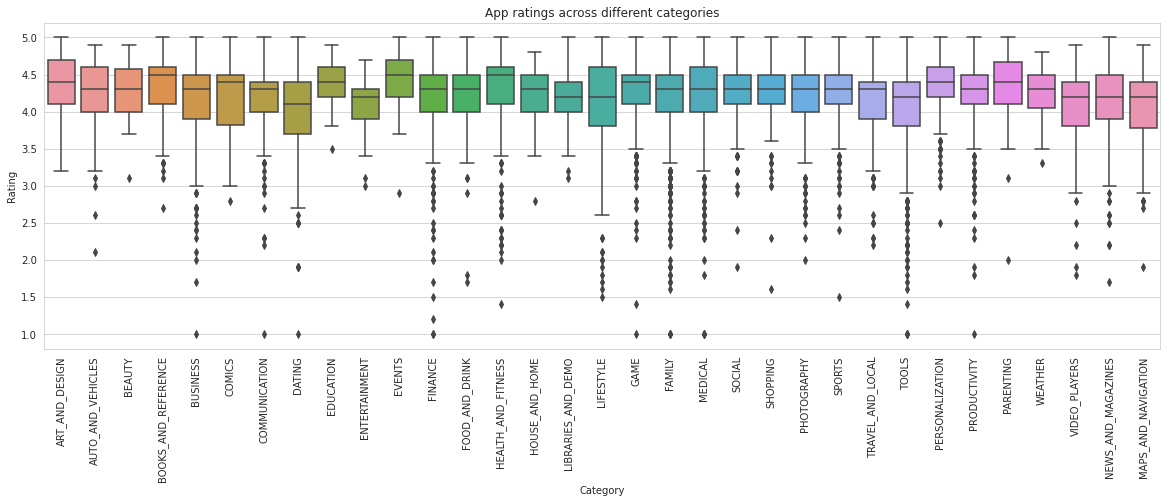

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Category',y='Rating',data = df)
plt.xticks(rotation=90)
plt.title('App ratings across different categories')
plt.show()


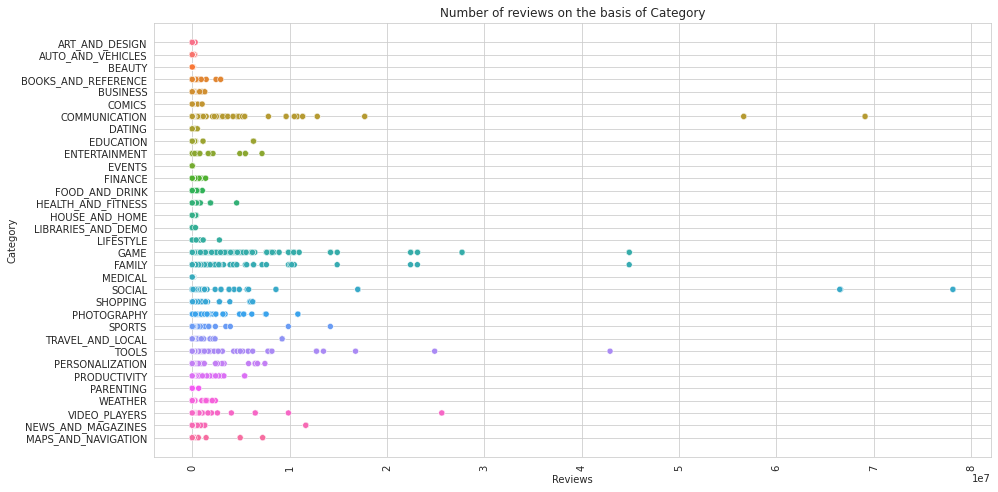

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.scatterplot(y='Category',x='Reviews',data = df,hue='Category',legend=False)
plt.xticks(rotation=90)
plt.title('Number of reviews on the basis of Category')
plt.show()


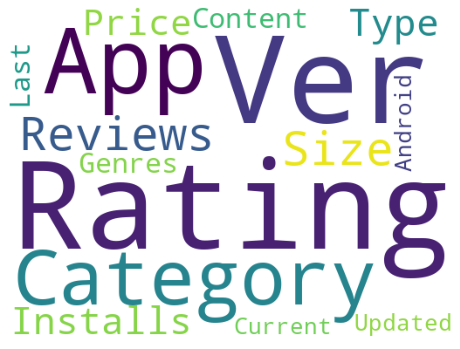

In [ ]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()